# Home Assignment 3 in Deep Learning [20 points]
**Goal:** Try out image classification using fully-connected and convolutional neural networks. <br />
**Grader:** Lovisa Hagström <br />
**Due Date:** 5/3 <br />
**Submitted by:** 📝 Sizhe, Shilpa, sizhec@chalmers.se, shilpas@chalmers.se

---

# Read this before starting

## General guielines 
* Answer all fields marked with 📝. This includes
    * your name, personal number and email address above, and
    * all later fields marked with "📝 Your answer here:".
* Feel free to add more cells if needed.
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook does not have to be run. The code in the notebook should reproduce the plots/results if we choose to run it. 
    * Do NOT hand in an assignment that isn't runnable!
* Do not modify the provided code unless told to do so.
* All tables and other additional information should be included in this notebook.
* Before submitting, make sure that your code can run on another computer, i.e. that all plots can show on another computer including all your writing. It is also good to check if your code can run on Google Colab.
* **Submit your solutions as a notebook file (`.ipynb`) and in HTML format (`.html`).** To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.


> **Note:** Training neural networks is computationally demanding and may take time if you run it on your laptop. Running the code in Google Colab will likely be faster and you can even get access to a GPU.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

> **Note:** If you are using Google Colab and you would like to export the notebook to HTML format, you need to first download it through `File` $\rightarrow$ `Download as` $\rightarrow$ `ipynb` and then use the standard tool for Jupyter Notebook conversion, nbconvert: jupyter nbconvert --to html notebook.ipynb (you need to run it from the command line). For more info (and example), see [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab).



## Required software

For this assignment you will need to install the following Python packages:

- `pytorch`: Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (make sure that you install it together with CUDA to enable GPU acceleration)
- `torchvision`: Typically installed with pytorch
- `numpy`: The fundamental package for scientific computing with Python (so fundamental there is a [Nature review](https://www.nature.com/articles/s41586-020-2649-2) on it) 
- `pandas`: Data analysis and manipulation tool
- `matplotlib`: Visualization with Python
- `pillow`: Image library to handle PIL images
- `catsndogs`: The data sets we will be working with.

> **Note:** In Google Colab you can install packages using   `!pip  install <package_name>`

> **Note:** In Google Colab several of these packages are preinstalled but it is a good habit to check if all required packages are installed beforehand and the installed versions of packages. Use `!pip list` to list packages installed by pip on Google Colab.

> **Note:** We recommend that you install these packages in a [virtual environment](https://docs.python.org/3/library/venv.html) if you are running this on your own computer.

___

## Neural networks

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 4 features,  one hidden layer
with activations $\mathbf{y}_1$ and a two-dimensional output layer with activations $\mathbf{y}_2 = \hat{\mathbf{y}}$.

![Neural network illustration.](https://raw.githubusercontent.com/lovhag/TA_stuff/master/fnn.png)

The activations of a layer $k$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}^{(k)}$ to the input activations $\mathbf{y}_{k - 1}$ producing the intermediate values $\mathbf{z}_k$:

$$
z_{k , j} = \sum_i  y_{k - 1,i} w^{(k)}_{i, j}\\
$$

This is followed by the element-wise application of the layers'
activation function $g_k$ to the intermediate values $\mathbf{z}_k$:

$$
y_{k,j} = g_{k} (z_{k,j})
$$

> **Note:** Here we use the same notation as in the lecture slides, but several different notations exist.


## Exercise 1: Backpropagation by hand [2 points]

Given the derivatives of a loss term $E$ with respect to the activations of the output neurons 
$\frac{dE}{dy_{2,j}}$ (and the variables/functions in the description above), derive expressions for the derivatives of the loss term with respect to the weights
$w^{(k)}_{i,j}$ and activations $y_{k,j}$ of the remaining layers of the network. Simplify as much as possible. Please show all the calculation details.

Also, to simplify the results, you are encouraged to reuse derivatives you have already computed in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dw^{(2)}_{i, j}} = \: ? \\
\frac{dE}{dy_{1,j}} = \: ? \\
\frac{dE}{dw^{(1)}_{i, j}} = \: ? \\
\frac{dE}{dy_{0,j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the loss function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

#### 📝 Your answer here: 

Answer\\

Given,
\begin{gather*}
    z_{k,j} = \sum_i y_{k-1,i}w^{(k)}_{i,j}, \quad y_{k,j} = g_k(z_{k,j}), \quad \frac{dE}{dy_{2,j}}
\end{gather*}

* $ \frac{dE}{dw^{(2)}_{i,j}}$
  \begin{gather*}
    \frac{dE}{dw^{(2)}_{i,j}} = \frac{dE}{dy_{2,j}}\frac{dy_{2,j}}{dw^{(2)}_{i,j}}\\
    \begin{split}
        \frac{dy_{2,j}}{dw^{(2)}_{i,j}} &= \frac{dy_{2,j}}{dz_{2,j}}\frac{\partial z_{2,j}}{\partial w^{(2)}_{i,j}}\\
        &= g^{'}_2(z_{2,j}).y_{1,j}
    \end{split} \\
    \therefore \frac{dE}{dw^{(2)}_{i,j}} = \frac{dE}{dy_{2,j}}.g^{'}_2(z_{2,j}).y_{1,j}
\end{gather*}

* $\frac{dE}{dy_{1,j}}$
  \begin{gather*}
    \frac{dE}{dy_{1,j}} = \frac{dE}{dy_{2,j}}\frac{dy_{2,j}}{dy_{1,j}}\\
    \begin{split}
       \frac{dy_{2,j}}{dy_{1,j}} &= \frac{dy_{2,j}}{dz_{2,j}}.\frac{\partial z_{2,j}}{\partial y_{1,j}}\\
    &= g^{'}_2(z_{2,j}).w^{(2)}_{i,j} 
    \end{split}\\
    \therefore \frac{dE}{dy_{1,j}} = \frac{dE}{dy_{2,j}}.g^{'}_2(z_{2,j}).w^{(2)}_{i,j}
\end{gather*}

* $\frac{dE}{dw^{(1)}_{i,j}}$
  \begin{gather*}
    \frac{dE}{dw^{(1)}_{i,j}} = \frac{dE}{dy_{2,j}}.\frac{dy_{2,j}}{dy_{1,j}}.\frac{dy_{1,j}}{dw^{(1)}_{i,j}}\\
    \begin{split}
        \frac{dy_{1,j}}{dw^{(1)}_{i,j}} &= g^{'}_1(z_{1,j}).\frac{\partial z_{1,j}}{\partial w^{(1)}_{i,j}}\\
    &= g^{'}_1(z_{1,j}).y_{0,j} 
    \end{split}\\
    \therefore \frac{dE}{dw^{(1)}_{i,j}} = \frac{dE}{dy_{2,j}}.g^{'}_2(z_{2,j}).w^{(2)}_{i,j}.g^{'}_1(z_{1,j})y_{0,j}
\end{gather*}

* $\frac{dE}{dy_{0,j}}$
  \begin{gather*}
    \frac{dE}{dy_{0,j}} = \frac{dE}{dy_{2,j}}.\frac{dy_{2,j}}{dy_{1,j}}.\frac{dy_{1,j}}{dy_{0,j}}\\
    \begin{split}
        \frac{dy_{1,j}}{dy_{0,j}} &= g^{'}_1(z_{1,j}).\frac{\partial z_{1,j}}{\partial y_{0,j}}\\
        &= g^{'}_1(z_{1,j}).w^{(1)}_{i,j}
    \end{split}\\
    \therefore  \frac{dE}{dy_{0,j}} = \frac{dE}{dy_{2,j}}.g^{'}_2(z_{2,j}).w^{(2)}_{i,j}.g^{'}_1(z_{1,j})w^{(1)}_{i,j}
\end{gather*}

## Exercise 2: Counting parameters in networks [2 points]

### a) [1 point]
Imagine you apply a two layer fully connected network to a 64x64 RGB image. The hidden layer has dimension 256 and the output is of size 20. How many parameters are necessary? Include the bias parameters. Show your calculations.

### b) [1 point]

Apply the following network to the same image, how many parameters are needed? Include bias parameters and use no padding. Show your calculations.

* Convolutional layer with 16 1x1 filters (stride 1).

* Convolutional layer with 48 3x3 filters (stride 1).

* Max pooling layer (5x5) (stride 3).

* Fully connected layer to ouput of size 10.

#### 📝 Your answer here:

## Exercise 3: Applying a filter to an image [1 point]

\begin{align}
\text{Image:} 
\begin{bmatrix}-1 & 2 & -2 & 3 \\
                2 & 1 & -2 & 1 \\
                1 & 3 & 1 & 1 \\
               -1 & 2 & 1 & -1 
\end{bmatrix}
\ \ 
\text{Filter:}
\begin{bmatrix}-1 & 1
\\1 & -1
\end{bmatrix}
\end{align}

Convolve the filter over the image and apply ReLU, use a stride of 2 with a bias of -2. What is the output? Give an explanation for the output, what is the filter detecting?

#### 📝 Your answer here:

## Exercise 4: Recurrent neural networks [3 points]

Consider a RNN, which maps a sequence of inputs $\mathbf{x}_0, \mathbf{x}_1, \ldots$ to a sequence of outputs $\mathbf{y}_0, \mathbf{y}_1, \ldots$. At each step $t$, the hidden state $\mathbf{h}_t$ and output $\hat{\mathbf{y}}_t$ of the RNN are computed using
\begin{align}
  \mathbf{h}_t &= \tanh(\mathbf{W}_{\mathbf{h}\mathbf{h}} \ \mathbf{h}_{t -1} + \mathbf{W}_{\mathbf{x}\mathbf{h}}\ \mathbf{x}_t ) \\
  \hat{\mathbf{y}}_t &= \mathbf{W}_{\mathbf{h}\mathbf{y}}\ \mathbf{h}_t
\end{align}
  
### a) [1 point]

The RNN is applied to a sequence of two inputs $\mathbf{x}_0, \mathbf{x}_1$. Write down the analytic expressions for the corresponding outputs $\hat{\mathbf{y}}_0, \hat{\mathbf{y}}_1$ assuming the initial hidden state to be the zero vector.

### b) [1 point]

Assume that the vectors $\mathbf{x}_0, \mathbf{x}_1$ each have a length of $6$, the hidden state $\mathbf{h}_t$ a length of $32$, the output vectors $\hat{\mathbf{y}}_0, \hat{\mathbf{y}}_1$ a length of $1$ and the bias is discarded. How many learnable parameters does the RNN described above have? How does this number depend on the length of the input sequence (i.e. how many $\mathbf{x}_0, \mathbf{x}_1, \mathbf{x}_3, ...$ are provided)?

### c) [1 point]

Describe two cases for which it would be more suitable to apply a RNN rather than any other network architecture.

#### 📝 Your answer here:

## Practical exercises - Image Classification
In this practical part of the assignment, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You will do this using the `pytorch` deep learning framework.

### The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

In [22]:
from catsndogs.training import cats, dogs # The lists of cat and dog images.

Below, a few examples of the images in the dataset.

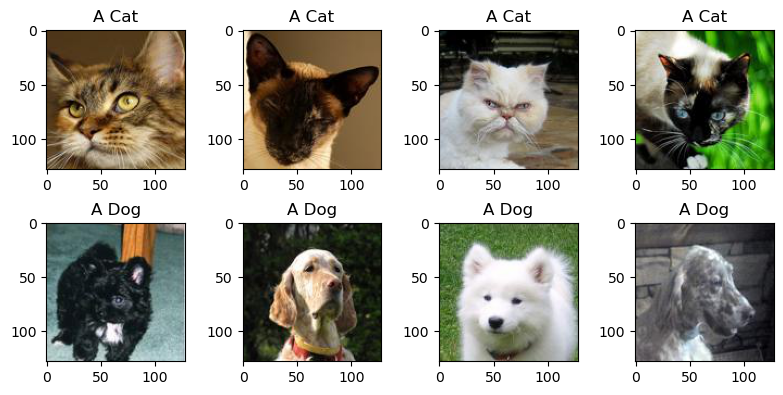

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()

## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [24]:
import torch
help(torch.tensor)

Help on built-in function tensor in module torch:

tensor(...)
    tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.
    
    .. warning::
    
        When working with tensors prefer using :func:`torch.Tensor.clone`,
        :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
        readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
        ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
        is equivalent to ``t.clone().detach().requires_grad_(True)``.
    
    .. seealso::
    
        :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
        :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.
    
    Args:
        data (array_like): Initial data for the tensor. Can be a li

##### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [25]:
from torchvision.transforms.functional import to_tensor, to_pil_image
image_name = np.random.choice(dogs)
dog = to_tensor(Image.open(image_name))
print("The size of 'dog' is:", dog.size())
dog

The size of 'dog' is: torch.Size([3, 128, 128])


tensor([[[0.6157, 0.6157, 0.6157,  ..., 0.6275, 0.6275, 0.6275],
         [0.6157, 0.6157, 0.6196,  ..., 0.6275, 0.6275, 0.6275],
         [0.6157, 0.6196, 0.6196,  ..., 0.6275, 0.6275, 0.6275],
         ...,
         [0.4824, 0.4745, 0.4667,  ..., 0.4549, 0.4745, 0.4941],
         [0.4706, 0.4588, 0.4471,  ..., 0.4667, 0.4784, 0.4980],
         [0.4627, 0.4510, 0.4392,  ..., 0.4667, 0.4627, 0.4745]],

        [[0.6157, 0.6157, 0.6157,  ..., 0.6275, 0.6275, 0.6275],
         [0.6157, 0.6157, 0.6196,  ..., 0.6275, 0.6275, 0.6275],
         [0.6157, 0.6196, 0.6196,  ..., 0.6275, 0.6275, 0.6275],
         ...,
         [0.4039, 0.3961, 0.3882,  ..., 0.3843, 0.4039, 0.4235],
         [0.4000, 0.3882, 0.3765,  ..., 0.3882, 0.4000, 0.4196],
         [0.4000, 0.3882, 0.3765,  ..., 0.3882, 0.3843, 0.3961]],

        [[0.6157, 0.6157, 0.6157,  ..., 0.6275, 0.6275, 0.6275],
         [0.6157, 0.6157, 0.6196,  ..., 0.6275, 0.6275, 0.6275],
         [0.6157, 0.6196, 0.6196,  ..., 0.6275, 0.6275, 0.

It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

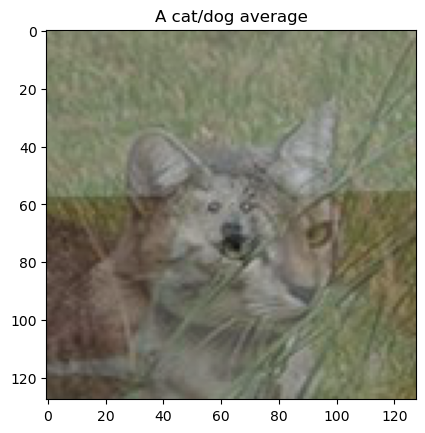

In [26]:
image_name = np.random.choice(cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [27]:
import torch
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)

#### Mathematical operations

In [28]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [29]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [30]:
t.requires_grad = True
#t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.7725899 , 0.98642491],
       [0.92532232, 0.36107234]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you compute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [31]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

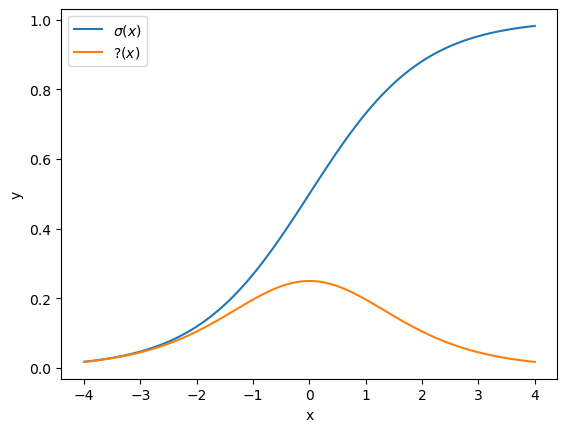

In [32]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = "$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = "$?(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

## Exercise 5: Derivatives of activation functions [1 point] 

Write down analytical expressions for the function $\sigma(x)$ and $?(x)$ shown above.

#### 📝 Your answer here:

Answer\\

\begin{gather*}
    \sigma(x) = \frac{1}{1+e^{-x}}\\
    \begin{split}
        ?(x) &= \frac{d\sigma(x)}{dx}\\
        &= -(1+e^{-x})^2.(-e^{-x})\\
        &= \frac{e^{-x}}{(1+e^{-x})^2}
    \end{split}
\end{gather*}

### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, calculations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards. GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. Hence by default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor using a GPU, you need to move its data to the GPU's memory.


> **Note:** If you are using Google Colab, you may need to enable GPU hardware acceleration by `Go to Menu > Runtime > Change runtime` and change hardware acceleration to GPU.

In [33]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

False


## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder`, which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.


Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [34]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder

images = ImageFolder(folder)

You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label, which is 0 for cat and 1 for dog.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


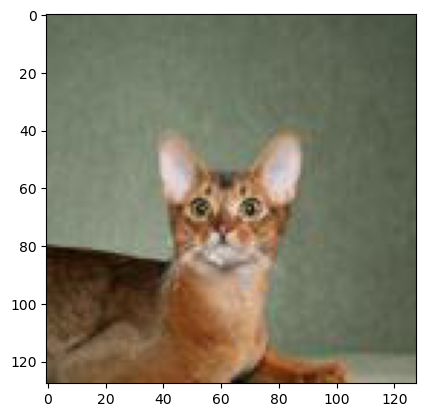

In [35]:
image, label = images[0]
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)

However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

The cell below adds a composition of two transforms to the dataset. The two transforms are applied sequentially to the image object that would otherwise be returned from the dataset. The first transform turns the image into a torch tensor and the second transform normalizes the image values so that they lie in the range $[-1, 1]$.

> Note: Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0.

In [36]:
from torchvision.transforms import Compose, ToTensor, Normalize

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)
image, label = images[0]
print("Type of image is now:", type(image))

Type of image is now: <class 'torch.Tensor'>


In [37]:
# This function inverts the transformation of the input images.
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

For the training, we further split the data into training and validation set:

In [38]:
n_train = int(0.9 * len(images))
n_val = len(images) - n_train
training_data_catsndogs, validation_data_catsndogs = torch.utils.data.random_split(images, (n_train, n_val))

## Exercise 6: Training a fully-connected network [7 points]
### Defining a neural network model

Neural networks in `pytorch` are represented using the [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class. The typical way to define a neural network model is to define a new class that inherits from the `Module` class.

### a) [2 points]

Inspect the code given below and, using the documentation of the [`torch.nn`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) module, answer the following questions:
- What is the architecture of instances of the `FullyConnected` class?
- What activations functions are applied in the hidden layers?
- What activation function is used for the output?
- How are the parameters of the network initialized? Why is this important to know?

In [39]:
from torch import nn

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        return x
    

#### 📝 Your answer here:

Answer\\

* The `FullyConnected` class defines a Feed Forward Neural Network with four hidden layers, each with a ReLU activation function.
* ReLU activation functions are applied in the hidden layers.
* No activation function is used on the output layer. The output will be the linear combination of the inputs connected to the output layer.
* The parameters of the network are initialized using the `pytorch` default initialization method, which randomly assigns weights from a uniform distribution with a range depending upon the input and output features of that layer. The bias is `True` by default, which means there will be an additive bias. It is important to know this since the initialization parameters can affect the convergence rate, reproducibility and fine-tuning of the model.

### The training loop

In the cell below you find code for a typical training loop in `pytorch`. 

### b) [1 point]

Look at the function below and answer the following questions: 

- Most of the actual training functionality is abstracted away in the arguments provided to the function. For each of the arguments, describe what tasks the corresponding object has to perform so that this method can be used to train a neural network.
- What functions do the calls `model.train()` and `model.eval()` have? Why are these calls important?

In [40]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a useful docstring, but that would
    give away the answer for the exercise.
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print("Batch ({} / {}): Loss {:.2f}".format(i, n, l.item()), end="\r")
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += l.item()
    validation_loss /= n
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)

#### 📝 Your answer here:

Answer\\

* `training_loader` specifies training data.
  
  `validation_loader` specifies validation data.
  
  `model` specifies the type of model to be trained.
  
  `loss` specifies the loss function to measure the difference between the prediction and the true label.
  
  `optimizer` specifies the optimization algorithm used to update the weights and biases based on the loss.
  
  `device` specifies the hardware on which the network runs.
  
* `model.train()` sets the model to train and calls the batch and dropout layers.
  
  `model.eval()` sets the model to evaluate and deactivates dropout.
  
   

## The optimizer object

In the code above the optimization method was hidden in the `optimizer` object. To understand how to write a suitable optimizer, you first need to understand a bit more about the role of `Module` objects in `pytorch`. The `torch.nn.Module` class is the base class for all neural networks and the components that make up neural networks. Module objects typically have trainable parameters. These trainable parameters of a module can be accessed via its `parameters()` member function. When a module contains attributes that are themselves `Module` instances, then  the `parameters()` function of the containing module will automatically list the trainable parameters of its `Module` attributes.

In order to  train a network, the optimizer needs to be aware of the module's parameters. In `pytorch` an optimizer object therefore always needs to be instantiated with a list of parameters that should be trained. In addition to that, an optimizer typically provides a function to set the gradients of the module parameters to zero. This is because gradients in pytorch are accumulated between consecutive calls to the `backward()` function.
This makes it necessary to set the gradients to zero between two training iterations.

Note here how the the `step` method of the `SGD` class performs gradient descent on the provided list of parameters.

> The `parameters()` member function returns a list of tensors representing the weight matrices and bias vectors in a network. Given a tensor `p`, you can access its gradients using the `p.grad` attribute.

> Because of the way `pytorch`'s autograd function works, changing the  value of a parameter `p` has to be done using its `p.data` attribute:

```
p.data = ...
```


In [41]:
class GradientDescent():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
        
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        for p in self.parameters:
            p.data.add_(p.grad, alpha=-self.learning_rate)

## Training the network

With the optimizer, the model and the training loop in place we are nearly able to start training the network, however a few details remain to be sorted out.

The `training_data_catsndogs` and `validation_data_catsndogs` object defined above can be used to iterate over the data, but only on a per sample basis. For the training of a neural network, however, we typically want to iterate through the data in batches. To take care of this, `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [42]:
from  torch.utils.data import DataLoader
training_loader_catsndogs = DataLoader(training_data_catsndogs, batch_size=32, shuffle=True)
validation_loader_catsndogs = DataLoader(validation_data_catsndogs, batch_size=32, shuffle=True)

Next, we need to choose a suitable training loss to minimize. We will use the Binary Cross Entropy with logits loss that combines a Sigmoid layer and the BCELoss in one single class. 

You can find and read more about other loss functions under [`torch.nn`](https://pytorch.org/docs/stable/nn.html).

> Note that the loss function is applied **directly** to the output of the network in the `train_epoch` function defined above. That is why we use a loss that also includes a sigmoid function. If we take the output as-is, it has the potential to be any real-valued number. By applying the sigmoid function, we bound the output to values between [0,1], which better corresponds to a predicted probability of cat (0) vs. dog (1).

In [43]:
loss = torch.nn.BCEWithLogitsLoss()

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [44]:
if torch.cuda.is_available():
    device = torch.device('cuda') # Default CUDA device
else:
    device = torch.device('cpu')

### c) [1 point]

Train the neural network for at least 10 epochs, then reduce the learning rate and continue training for at least another 10 epochs. Plot the resulting training and validation losses, and answer the following question(s):

- Was the training successful? Explain why.  
- If the training was unsuccessful, give suggestion(s) on what can be done to make the training successful over the same number of epochs.


#### 📝 Your answer here:

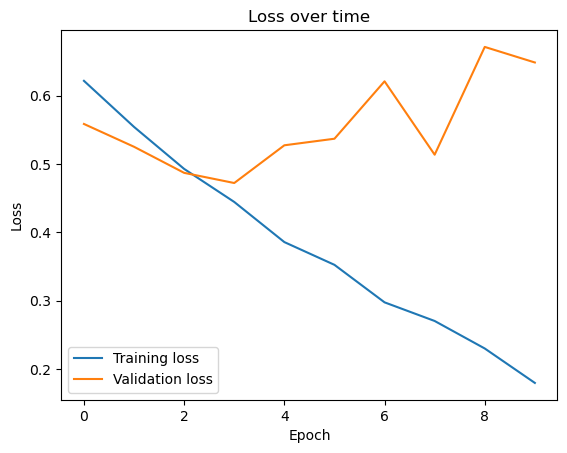

In [47]:
import matplotlib.pyplot as plt
input_features = 3*128*128
width = 500
n_epoch = 10

fc_model = FullyConnected(input_features, width)
optimizer = GradientDescent(fc_model.parameters(), learning_rate=0.05)

train_list_conv = []
validation_list_conv = []

for epoch in range(n_epoch):
    training_loss, validation_loss = train_epoch(training_loader_catsndogs, validation_loader_catsndogs, fc_model, loss, optimizer, device)
    if epoch==9:
        optimizer = GradientDescent(fc_model.parameters(), learning_rate=0.004)
    train_list_conv.append(training_loss)
    validation_list_conv.append(validation_loss)
    
plt.plot(train_list_conv)
plt.plot(validation_list_conv)
plt.title('Loss over time)
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### d) [2 points]

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$. Then, using the code below, plot the ROC curve. What is the significance of the black, dashed line?

#### 📝 Your answer here:

In [26]:
def receiver_operating_characteristic(model,
                                      validation_loader,
                                      ps):
    """
    Computes receiver operating characteristic for given model and
    validation data.
    
    Arguments:
        model: The pytorch model to evaluate.
        validation_loader: torch DataLoader to use to iterate over validation data.
        ps: Iterable containing the values of the discrimination threshold in
           increasing order.
    Returns:
        (fpr, tpr): Tuple containing the false positive rates (fpr) and the true
            positive rates as numpy.ndarrays.
    """
    ...

In [ ]:
fpr, tpr = receiver_operating_characteristic(fc_model, validation_loader_catsndogs, np.linspace(0, 1, 101))

def plot_ROC(fpr,tpr):
    """
    Plots ROC curve

    Arguments:
        fpr: array-like containing false positive rates
        tpr: array-like containing true positive rates

    """
    x = np.linspace(0, 1, 101)
    f, ax = plt.subplots(1, 1)
    ax.plot(x, x, c="k", ls="--")
    ax.plot(fpr, tpr)
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title("Receiver operator characteristic")

plot_ROC(fpr,tpr)

### e) [1 point]

One way to summarize the receiver operator characteristic (ROC) is to compute the area under the curve. This can be done using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Complete the code below and write a function for computing the area under the receiver operator characteristic curve (AUC ROC) using the trapezoidal rule. Then, calculate the area under the ROC-curve for the curve above using this function.

    Note that you are not allowed to use any built-in trapeziodal function (e.g. the one from NumPy). You are to make your own implementation.


#### 📝 Your answer here:

In [27]:
def auc_roc(fpr, tpr):
    """
    Computes area under receiver operating characteristic curve using the
    trapeziodal rule for given false positive and true positive rates.
    
    Arguments:
        fpr: False positive rates.
        tpr: True positive rates.
        
    Returns:
        auc_roc: Area under the receiver operating characteristic curve as
            float value
    """
    ...

Finally, let's look at the prediction for samples from the validation set. Is this what you expected? You do not have to write down an answer for this question, but you should always spend some time to reflect on your results.

In [28]:
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
        
plot_results(fc_model, validation_data_catsndogs)

NameError: name 'fc_model' is not defined

## Exercise 7: Training a convolutional neural network [3 points]

### a) [1 point]

Define and train a convolutional network with the following architecture:
- 2D conv. layer: $16$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $4 \times 4$, stride 4
- 2D conv. layer: $32$ filters, kernel size $4 \times 4$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- 2D conv. layer: $64$ filters, kernel size $3 \times 3$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- Fully connected layer: 1 neuron
    
> Note that a sigmoid activation function does not have to be used for the output as this is already handled in the [BCEWithLogitsLoss](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) loss function we selected previously. 

> **Hint:** You can find all necessary components to implement the convolutional network in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module.

#### 📝 Your answer here:

In [ ]:
conv_model = ...

### b)  [2 points]

Tune the network architecture and training routine to achieve a validation loss lower than 0.3. Do at least 2 improvements. Some things you may want to try: 
- Alter the complexity of your network (number of layers, filters or neurons)
- A learning rate schedule
- Checkpoints or early stopping
- Data augmentation to increase the number of training points
- Dropout
- Other regularization techniques


#### 📝 Your answer here:

## Exercise 8: Evaluation on test set [1 point]

Now evaluate the performance of the fully-connected neural network to your best convolutional neural network on the `catsndogs` test data, which is available in `catsndogs.test` module.

- Plot ROC curves and compute AUC ROC for both the fully-connected and the convolutional model.
- Compute the accuracy of each model for a discimination threshold p = 0.5
- Provide a plot, for each model, of 8 images from the test set together with the prediction from the model.

#### 📝 Your answer here: